Lenet was the first CNN developed by Yan LeCun, It was designed to recognize handwritten digits on bank cheque.

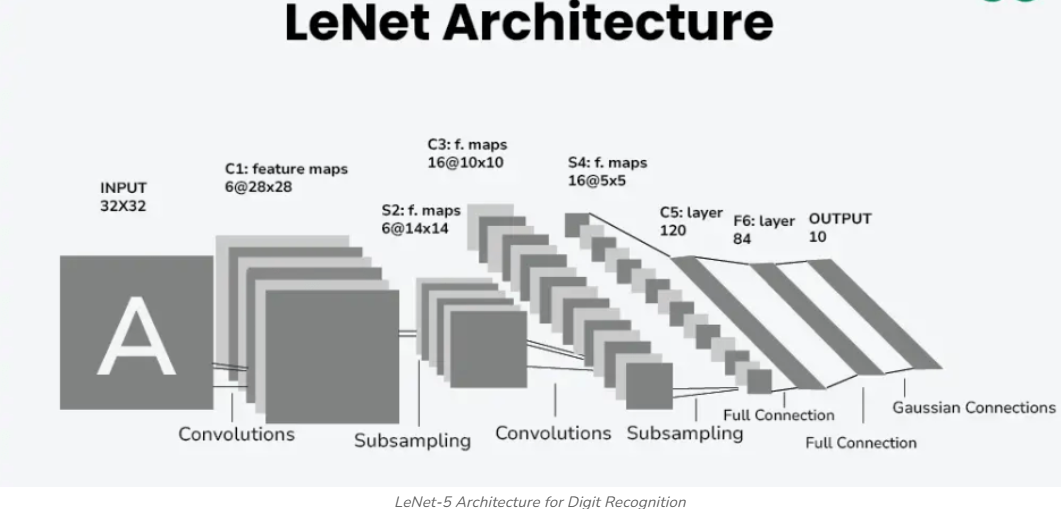

#### Architecture:
Input: 32×32 grayscale image<br>
Conv Layer 1: feature maps + activation<br>
Pooling/Subsampling: reduce spatial size<br>
Conv Layer 2: more feature maps<br>
Pooling/Subsampling<br>
Fully Connected Layers → output class scores

In [1]:
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.keras.layers import Dense,Conv2D,Flatten,AveragePooling2D
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt

In [2]:
(train_images, train_labels), (test_images, test_labels) =mnist.load_data()

In [3]:
lenet=Sequential()
lenet.add(Conv2D(6,kernel_size=(2,2),padding="same",activation="tanh",input_shape=(28,28,1)))
lenet.add(AveragePooling2D(pool_size=(2,2),strides=2))
lenet.add(Conv2D(16,kernel_size=(2,2),activation="tanh"))
lenet.add(AveragePooling2D(pool_size=(2,2),strides=2))
lenet.add(Flatten())
lenet.add(Dense(140,activation="tanh"))
lenet.add(Dense(84,activation="tanh"))
lenet.add(Dense(10,activation="softmax"))

d:\Deep Learning\.venv\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
lenet.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 14, 14, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 16)     │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 6, 6, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 140)            │        80,780 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        11,844 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,904 (366.81 KB)

 Trainable params: 93,904 (366.81 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
lenet.compile(optimizer="adam",loss='sparse_categorical_crossentropy',metrics=["accuracy"])

In [7]:
lenet.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels),verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9464 - loss: 0.1773 - val_accuracy: 0.9785 - val_loss: 0.0743
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9767 - loss: 0.0742 - val_accuracy: 0.9806 - val_loss: 0.0609
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9832 - loss: 0.0536 - val_accuracy: 0.9812 - val_loss: 0.0602
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9871 - loss: 0.0409 - val_accuracy: 0.9870 - val_loss: 0.0411
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9894 - loss: 0.0327 - val_accuracy: 0.9858 - val_loss: 0.0442
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9921 - loss: 0.0254 - val_accuracy: 0.9868 - val_loss: 0.0467
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9932 - loss: 0.0222 - val_accuracy: 0.9859 - val_loss: 0.0460
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9938 - loss: 0.0197 

In [12]:
lenet.predict(test_images)[0]### 9.9998784e-01 probability for 7

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([1.5825240e-09, 1.0203822e-07, 5.3692247e-07, 4.3833270e-06,
       1.2154527e-07, 5.0118905e-09, 2.2121202e-13, 9.9998784e-01,
       2.0537287e-08, 6.9053717e-06], dtype=float32)

In [13]:
test_labels[0]

7